# Data Profiling - LMA Features Data

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from CSV

In [11]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [12]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876,-0.5,0.6,0.9


## Data Analysis

### Data Shape

In [13]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 2 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)
print('Entries to Feature Ratio:', entries2variables_ration)

No. entries: 12213 
No. Features: 43
Entries to Feature Ratio: 284.0232558139535


### Variable Types

In [14]:
print("Feature Types:\n" + str(data.dtypes))

Feature Types:
max_hand_distance                float64
avg_l_hand_hip_distance          float64
avg_r_hand_hip_distance          float64
max_stride_length                float64
avg_l_hand_chest_distance        float64
avg_r_hand_chest_distance        float64
avg_l_elbow_hip_distance         float64
avg_r_elbow_hip_distance         float64
avg_chest_pelvis_distance        float64
avg_neck_chest_distance          float64
avg_neck_rotation_w              float64
avg_neck_rotation_x              float64
avg_neck_rotation_y              float64
avg_neck_rotation_z              float64
avg_total_body_volume            float64
avg_triangle_area_hands_neck     float64
avg_triangle_area_feet_hips      float64
l_hand_speed                     float64
r_hand_speed                     float64
l_foot_speed                     float64
r_foot_speed                     float64
neck_speed                       float64
l_hand_acceleration_magnitude    float64
r_hand_acceleration_magnitude    float64
l

### Granularity

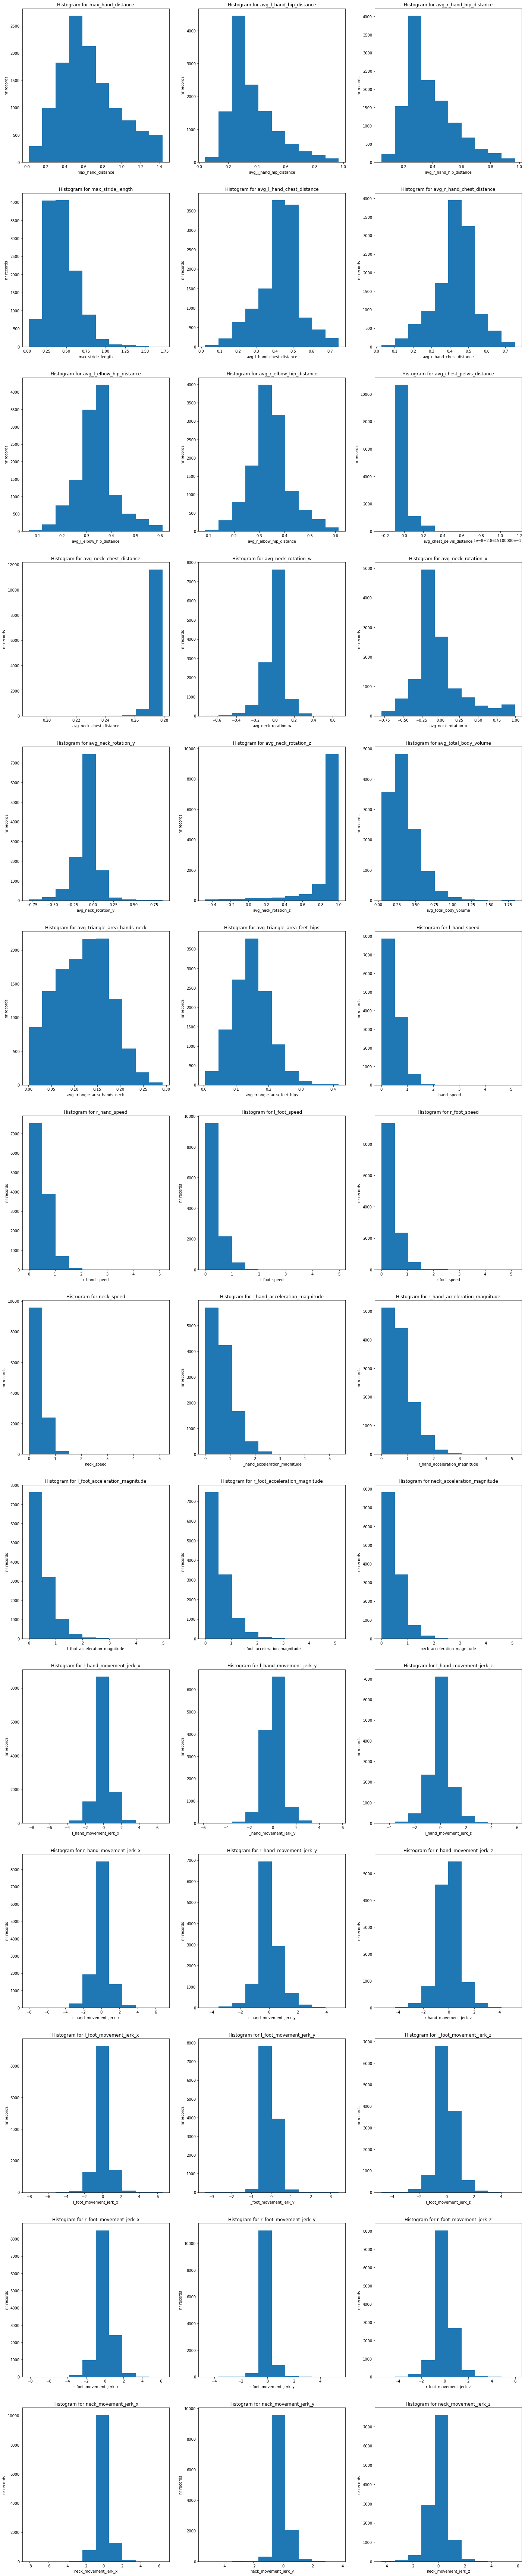

In [15]:
variables = data.drop(columns=['EMOTION_P', 'EMOTION_A', 'EMOTION_D'])
variables = variables.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values)

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Correlation Analysis

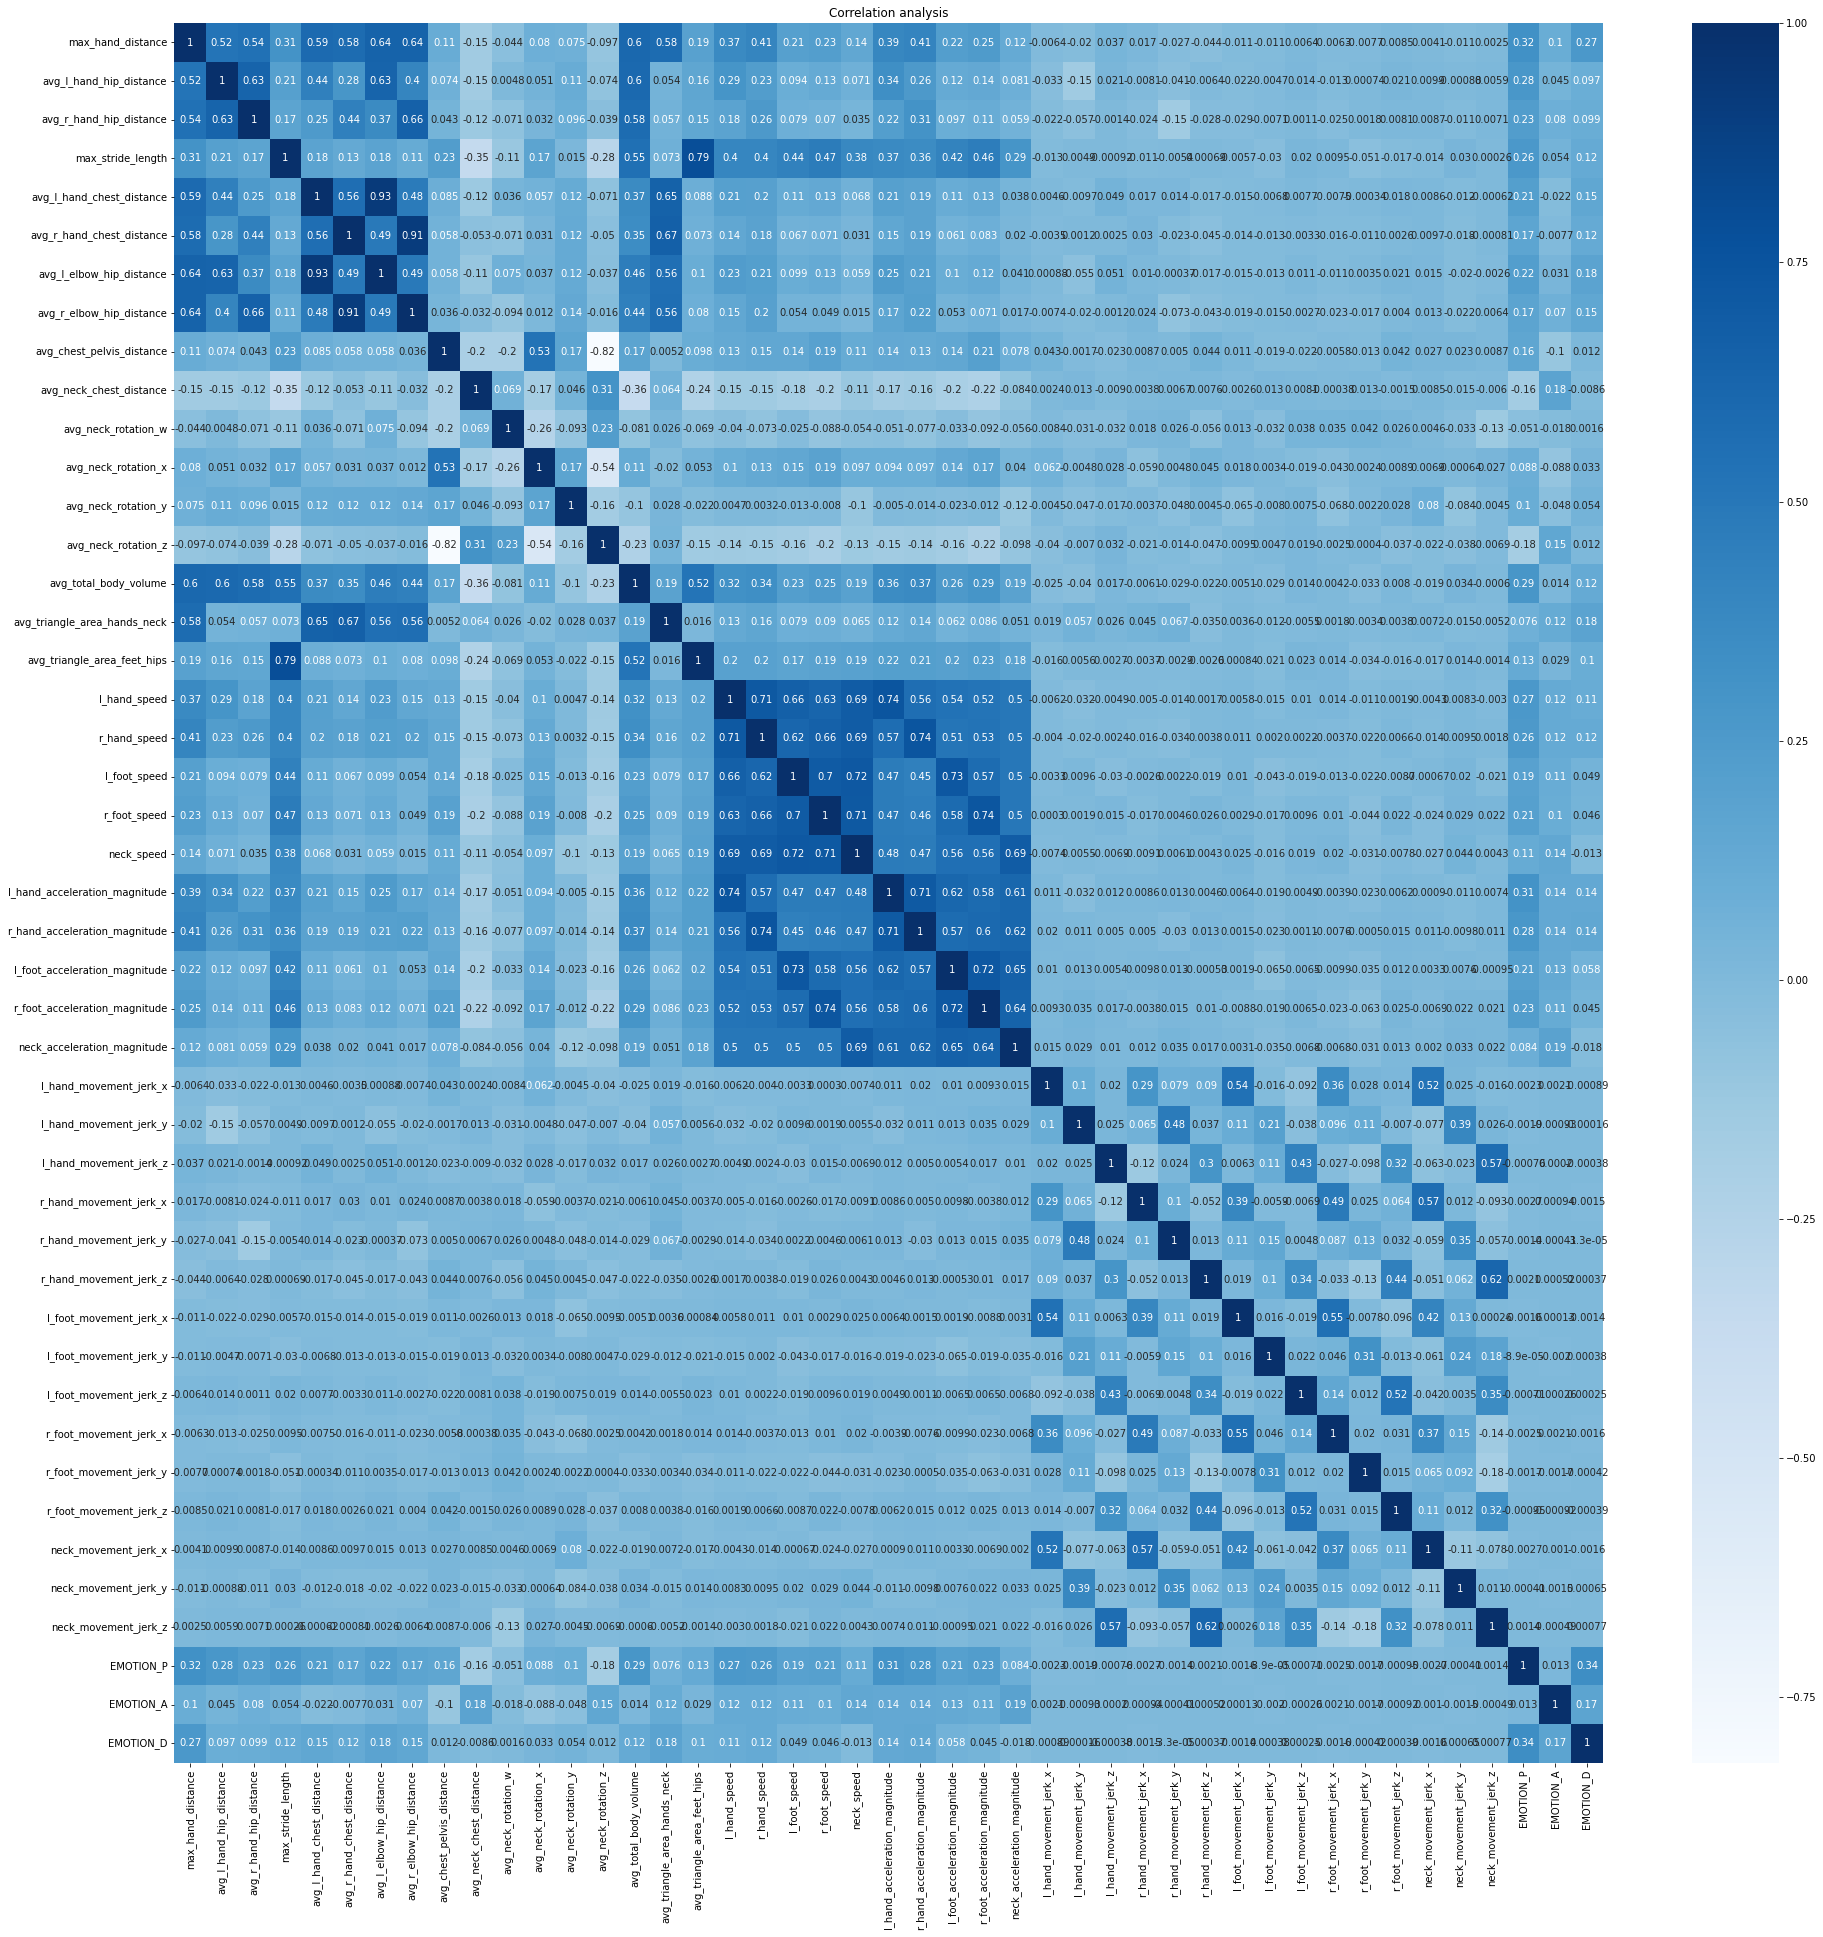

In [16]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [17]:
df = pd.DataFrame(data)

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.324248
avg_l_hand_hip_distance          0.275666
avg_r_hand_hip_distance          0.231924
max_stride_length                0.264138
avg_l_hand_chest_distance        0.212465
avg_r_hand_chest_distance        0.167063
avg_l_elbow_hip_distance         0.224045
avg_r_elbow_hip_distance         0.172903
avg_chest_pelvis_distance        0.157582
avg_neck_chest_distance          0.160700
avg_neck_rotation_w              0.050646
avg_neck_rotation_x              0.087640
avg_neck_rotation_y              0.103704
avg_neck_rotation_z              0.175352
avg_total_body_volume            0.287122
avg_triangle_area_hands_neck     0.075926
avg_triangle_area_feet_hips      0.125886
l_hand_speed                     0.268198
r_hand_speed                     0.258517
l_foot_speed                     0.193980
r_foot_speed                     0.211540
neck_speed                       0.112984
l_hand_acceleration_ma

Note: Movement Jerk doesn't seem to be too useful!